# Persistent homology analysis of CA1 Hippocampus data

## Set up environment paths

In [18]:
import setup
setup.main()

%load_ext autoreload
%autoreload 2

Working directory:  /Users/facosta/Desktop/code/neuralgeom/neuralgeom
Directory added to path:  /Users/facosta/Desktop/code/neuralgeom
Directory added to path:  /Users/facosta/Desktop/code/neuralgeom/neuralgeom
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [104]:
import numpy as np
from lovely_numpy import lo
import neuralgeom.datasets.experimental as experimental

import persistent_homology
import viz

import seaborn as sns
import matplotlib.pyplot as plt

## Load neural activity

In [133]:
expt_id = "34"
timestep_microsec = int(4e5)
vel_threshold = 5

neural_activity, labels = experimental.load_neural_activity(expt_id=expt_id, vel_threshold= vel_threshold, timestep_microsec=timestep_microsec)

times_in_seconds = labels["times"]*1e-6
angles = labels["angles"]

print(f"There are {neural_activity.shape[1]} neurons binned over {neural_activity.shape[0]} timesteps")

INFO: # - Found file at /Users/facosta/Desktop/code/neuralgeom/neuralgeom/data/binned/expt34_times_timestep400000_velthreshold_5.txt! Loading...
INFO: # - Found file at /Users/facosta/Desktop/code/neuralgeom/neuralgeom/data/binned/expt34_neural_activity_timestep400000_velthreshold_5.npy! Loading...
INFO: # - Found file at /Users/facosta/Desktop/code/neuralgeom/neuralgeom/data/binned/expt34_labels_timestep400000_velthreshold_5.txt! Loading...


There are 40 neurons binned over 1613 timesteps


In [138]:
from sklearn.feature_selection import mutual_info_regression
angles_radians = angles*np.pi/180

X = np.cos(angles_radians)
Y = np.sin(angles_radians)

spatial_mutual_info_X = mutual_info_regression(neural_activity,X)
spatial_mutual_info_Y = mutual_info_regression(neural_activity,Y)
spatial_mutual_info_XY = spatial_mutual_info_X + spatial_mutual_info_Y


mi_threshold = 0.15
mi_thresh_neural_activity = neural_activity[:,spatial_mutual_info_XY>mi_threshold]

print(f"There are {mi_thresh_neural_activity.shape[1]} neurons with spatial mutual information > {mi_threshold}")

There are 19 neurons with spatial mutual information > 0.15


## Compute persistent homology

**Compute persistence diagrams**

In [141]:
diagrams = persistent_homology.compute_persistence_diagrams(mi_thresh_neural_activity, maxdim=1, n_threads=-1)

Function 'compute_persistence_diagrams' executed in 0.3273s


**Visualize persistence diagrams**

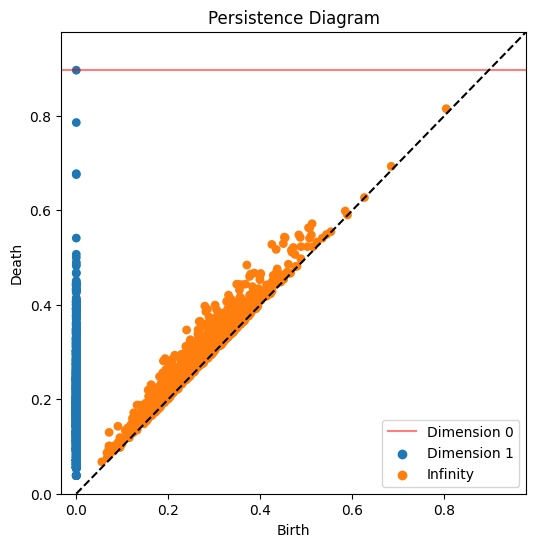

In [166]:
viz.plot_persistence_diagrams(diagrams,density=False)

**Try: normalize each neuron's activity**

In [161]:
norms = np.max(mi_thresh_neural_activity, axis=0)
norms = norms.reshape(1,-1)

In [163]:
norm_mi_thresh_neural_activity = mi_thresh_neural_activity/norms

In [165]:
diagrams = persistent_homology.compute_persistence_diagrams(norm_mi_thresh_neural_activity, maxdim=1, n_threads=-1)

Function 'compute_persistence_diagrams' executed in 0.3081s


In [ ]:
viz.plot_persistence_diagrams(diagrams,density=False)